In [39]:
from glob import glob
from librosa import get_duration
from matplotlib import pyplot as plt

durs = []
for fname in glob('./**/*.flac', recursive=True):
    dur = get_duration(filename=fname)
    if dur < 25:
        durs += [dur]

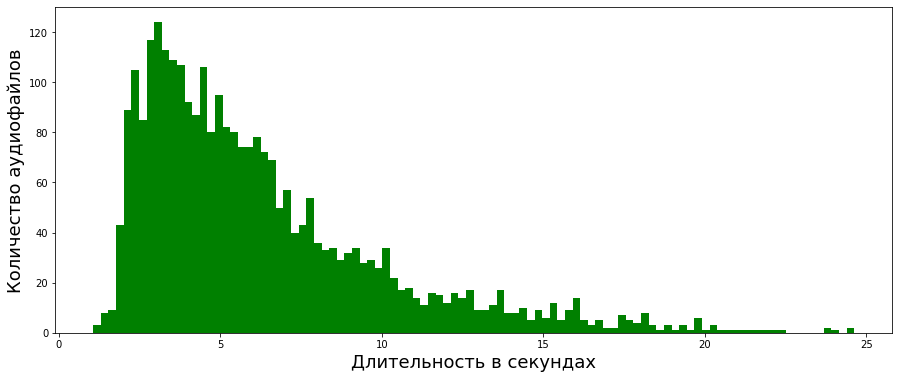

In [40]:
plt.figure(figsize=(15, 6))
ax = plt.gca()
ax.set_xlabel('Длительность в секундах', fontsize=18)
ax.set_ylabel('Количество аудиофайлов', fontsize=18)
plt.hist(durs, bins=100, color='g')
plt.show()

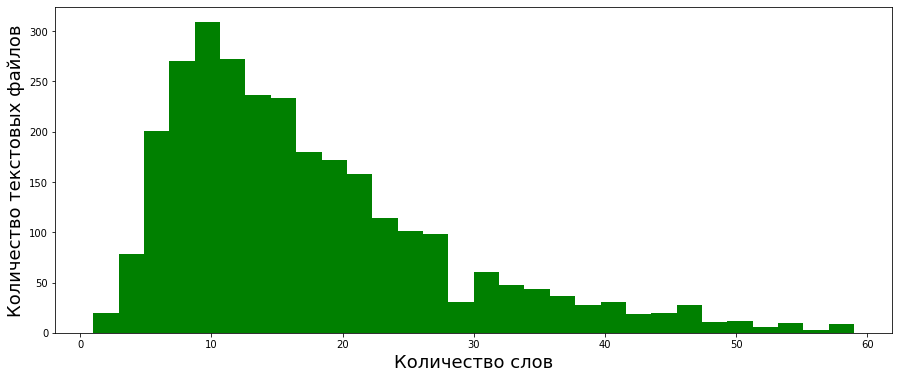

In [41]:
n_words_stat = []
for fname in glob('./**/*.txt', recursive=True):
    for line in open(fname):
        n_words = len(line.split()[1:])
        if n_words < 60:
            n_words_stat += [n_words]
        
plt.figure(figsize=(15, 6))
ax = plt.gca()
ax.set_xlabel('Количество слов', fontsize=18)
ax.set_ylabel('Количество текстовых файлов', fontsize=18)
plt.hist(n_words_stat, bins=30, color='g')
plt.show()

In [55]:
from collections import defaultdict

by_sex = defaultdict(float)
by_name = defaultdict(float)
with open('LibriSpeech/SPEAKERS.TXT') as f:
    data = f.readlines()
    for line in data[13:]:
        fields = line.split()
        
        sex = fields[2]
        minutes = float(fields[6])
        name = " ".join(fields[8:])

        by_sex[sex] += minutes
        by_name[name] += minutes

In [66]:
import numpy as np
import pandas as pd

In [76]:
vals = np.array(list(by_name.values()))
print(pd.DataFrame(vals).describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &            0 \\
\midrule
count &  2476.000000 \\
mean  &    23.793788 \\
std   &     6.193447 \\
min   &     1.920000 \\
25\%   &    22.190000 \\
50\%   &    25.090000 \\
75\%   &    28.082500 \\
max   &    76.240000 \\
\bottomrule
\end{tabular}



<ipython-input-76-fedaefbb06f7>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(vals).describe().to_latex())


In [74]:
np.quantile(vals, 0.75)

28.0825